# Exploratory Data Analysis (EDA)

## Introduction

This exploratory data analysis (EDA) aims to understand the structure and characteristics of a dataset related to accidents. By using various Python libraries, such as pandas, matplotlib, seaborn, and SQLAlchemy, we retrieve, process, and visualize the data to identify patterns, trends, and potential insights. The steps involved in this analysis include data extraction, cleaning, transformation, and visualization.

## Importing Libraries and Database Connection

The analysis begins with importing essential libraries, including pandas for data manipulation, matplotlib and seaborn for visualization, and SQLAlchemy for database connectivity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
from sqlalchemy import text
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import declarative_base 
import numpy as np
import textwrap

## Connection with PostgreSQL
A connection to a PostgreSQL database is established using SQLAlchemy. This allows data to be extracted directly from the database.
conectar_db(): A custom function that establishes the connection to the database. Make sure this function is defined in the conexion_db.py file.

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from config.conexion_db import conectar_db

conexion = conectar_db()

✅ conexion_db.py se está ejecutando correctamente
✅ Conexión exitosa con psycopg2


## Data Extraction and Initial Exploration

The first step in understanding the dataset is extracting a small sample of records from the database. The query below retrieves five records from the accidentes table:

In [4]:
df = pd.read_sql("SELECT * FROM accidentes LIMIT 5;", conexion)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23256\639739079.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM accidentes LIMIT 5;", conexion)


,id,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,1,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,3,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,4,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,5,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


## Initial Data Inspection

Following this, the structure of the dataset is examined using df.info(), which provides details about column names, data types, and missing values.
This helps in understanding the dataset’s complexity and identifying any necessary data transformations.

In [4]:
print("Información básica del dataset:")
print(df.info())

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             5 non-null      int64         
 1   crash_date                     5 non-null      datetime64[ns]
 2   traffic_control_device         5 non-null      object        
 3   weather_condition              5 non-null      object        
 4   lighting_condition             5 non-null      object        
 5   first_crash_type               5 non-null      object        
 6   trafficway_type                5 non-null      object        
 7   alignment                      5 non-null      object        
 8   roadway_surface_cond           5 non-null      object        
 9   road_defect                    5 non-null      object        
 10  crash_type                     5 non-null      object     

# Data Cleaning and Transformation

## Conversión de una Columna a Tipo Categórico

One of the key transformations applied is converting the ´most_severe_injury´ column into a categorical variable with an explicit order. This ensures that severity levels are interpreted correctly during analysis.


In [5]:
df['most_severe_injury'] = pd.Categorical(df['most_severe_injury'],
                                          categories=['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',
                                                      'NON-INCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL'],
                                          ordered=True)

Conversión de Variable Binaria
Facilita el análisis estadístico y la construcción de modelos al tratar la variable como numérica.

In [6]:
df['intersection_related'] = df['intersection_related'].apply(lambda x: 1 if x == 'Y' else 0)

This transformation enhances the dataset’s usability by allowing comparisons and ordered visualizations.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             5 non-null      int64         
 1   crash_date                     5 non-null      datetime64[ns]
 2   traffic_control_device         5 non-null      object        
 3   weather_condition              5 non-null      object        
 4   lighting_condition             5 non-null      object        
 5   first_crash_type               5 non-null      object        
 6   trafficway_type                5 non-null      object        
 7   alignment                      5 non-null      object        
 8   roadway_surface_cond           5 non-null      object        
 9   road_defect                    5 non-null      object        
 10  crash_type                     5 non-null      object        
 11  intersection_related   

 ## Descriptive Statistics
Descriptive statistics are calculated for numeric and categorical variables.
df.describe(): Provides statistics such as mean, standard deviation, minimum, maximum, etc.
Ayuda a entender la distribución de los datos y detectar posibles problemas como valores extremos o desequilibrios.

In [8]:
print("\nEstadísticas descriptivas:")
print(df.describe(include='all').to_string())


Estadísticas descriptivas:
              id           crash_date traffic_control_device weather_condition lighting_condition first_crash_type trafficway_type           alignment roadway_surface_cond road_defect              crash_type  intersection_related         damage prim_contributory_cause  num_units       most_severe_injury  injuries_total  injuries_fatal  injuries_incapacitating  injuries_non_incapacitating  injuries_reported_not_evident  injuries_no_indication  crash_hour  crash_day_of_week  crash_month
count   5.000000                    5                      5                 5                  5                5               5                   5                    5           5                       5                   5.0              5                       5   5.000000                        4        5.000000             5.0                      5.0                     5.000000                            5.0                 5.00000    5.000000            5.00000     5

## Checking for Missing Values
The presence of missing values in the dataset is checked.
Permite identificar qué columnas tienen valores faltantes y evaluar estrategias de imputación o eliminación.

In [10]:
print("\nValores faltantes por columna:")
print((df.isnull().sum() + (df == "UNKNOWN").sum()).to_string())


Valores faltantes por columna:
id                               0
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             2
road_defect                      2
crash_type                       0
intersection_related             0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               1
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0


# Data Cleanup

Remove extra spaces from the most_severe_injury column to ensure consistency and prevent errors in future analysis
Prints unique values ​​and the data type of the column.
Only two values ​​are found: "NO INDICATION OF INJURY" and null values ​​( NaN).

In [12]:
df["most_severe_injury"] = df["most_severe_injury"].str.strip()
print(df["most_severe_injury"].unique())

print(df["most_severe_injury"].dtype)

['NO INDICATION OF INJURY' nan]
object


Displays the count of each value in the column, including null values.
The data shows 4 records with "NO INDICATION OF INJURY" and 1 record with a null value.
Permite ver la distribución de las lesiones reportadas en los accidentes.
Ayuda a detectar posibles valores atípicos o inconsistentes.

In [13]:
print(df["most_severe_injury"].value_counts(dropna=False))

most_severe_injury
NO INDICATION OF INJURY    4
NaN                        1
Name: count, dtype: int64


You try to filter records with the value "NON-INCAPACITATING INJURY", but the output shows that no records contain this value.
Permite observar casos específicos de accidentes con lesiones no incapacitantes.
Puede servir para validar la calidad de los datos en esta categoría.

In [ ]:
print(df[df["most_severe_injury"] == "NON-I NCAPACITATING INJURY"])

Empty DataFrame
Columns: [id, crash_date, traffic_control_device, weather_condition, lighting_condition, first_crash_type, trafficway_type, alignment, roadway_surface_cond, road_defect, crash_type, intersection_related, damage, prim_contributory_cause, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, crash_hour, crash_day_of_week, crash_month]
Index: []

[0 rows x 25 columns]


## Extracting Date Features
Features such as year, month, day, and hour are extracted from the crash_date column.
Facilita el análisis temporal de los accidentes, permitiendo estudiar patrones estacionales o tendencias horarias.


In [ ]:
df['crash_year'] = df['crash_date'].dt.year
df['crash_month'] = df['crash_date'].dt.month
df['crash_day'] = df['crash_date'].dt.day
df['crash_hour'] = df['crash_date'].dt.hour

# Resumen Estadístico
dentificar distribuciones, valores atípicos y rangos de las variables numéricas.


In [13]:
df.describe()

,id,crash_date,intersection_related,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year,crash_day
count,5.000000,5,5.0,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,3.000000,2023-04-10 11:42:12,1.0,2.200000,1.000000,0.0,0.0,1.000000,0.0,2.20000,11.200000,4.80000,8.600000,2022.600000,15.800000
min,1.000000,2021-12-09 10:30:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,1.00000,7.000000,2021.000000,9.000000
25%,2.000000,2023-07-29 13:00:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,2.00000,10.000000,4.00000,8.000000,2023.000000,9.000000
50%,3.000000,2023-08-09 19:55:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,3.00000,13.000000,5.00000,8.000000,2023.000000,13.000000
75%,4.000000,2023-08-13 00:11:00,1.0,2.000000,0.000000,0.0,0.0,0.000000,0.0,3.00000,14.000000,7.00000,8.000000,2023.000000,19.000000
max,5.000000,2023-08-19 14:55:00,1.0,3.000000,5.000000,0.0,0.0,5.000000,0.0,3.00000,19.000000,7.00000,12.000000,2023.000000,29.000000
std,1.581139,NaN,0.0,0.447214,2.236068,0.0,0.0,2.236068,0.0,1.30384,7.049823,2.48998,1.949359,0.894427,8.438009


## Estadísticas Descriptivas para Variables Categóricas

Ayuda a entender la diversidad de valores en cada categoría y a detectar posibles problemas como valores inconsistentes o mal codificados.


In [ ]:
stats_cat = df.describe(include=["object"])

stats_cat

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause
count,5,5,5,5,5,5,5,5,5,5,5
unique,1,1,2,3,3,1,2,2,2,2,4
top,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE
freq,5,5,4,2,2,5,3,3,4,3,2


# Data Visualization


Visualizations such as histograms, bar charts, and heatmaps are used to explore the data.

## Correlation Analysis
Identificar relaciones entre variables, lo cual puede ser útil para análisis predictivos y modelado.

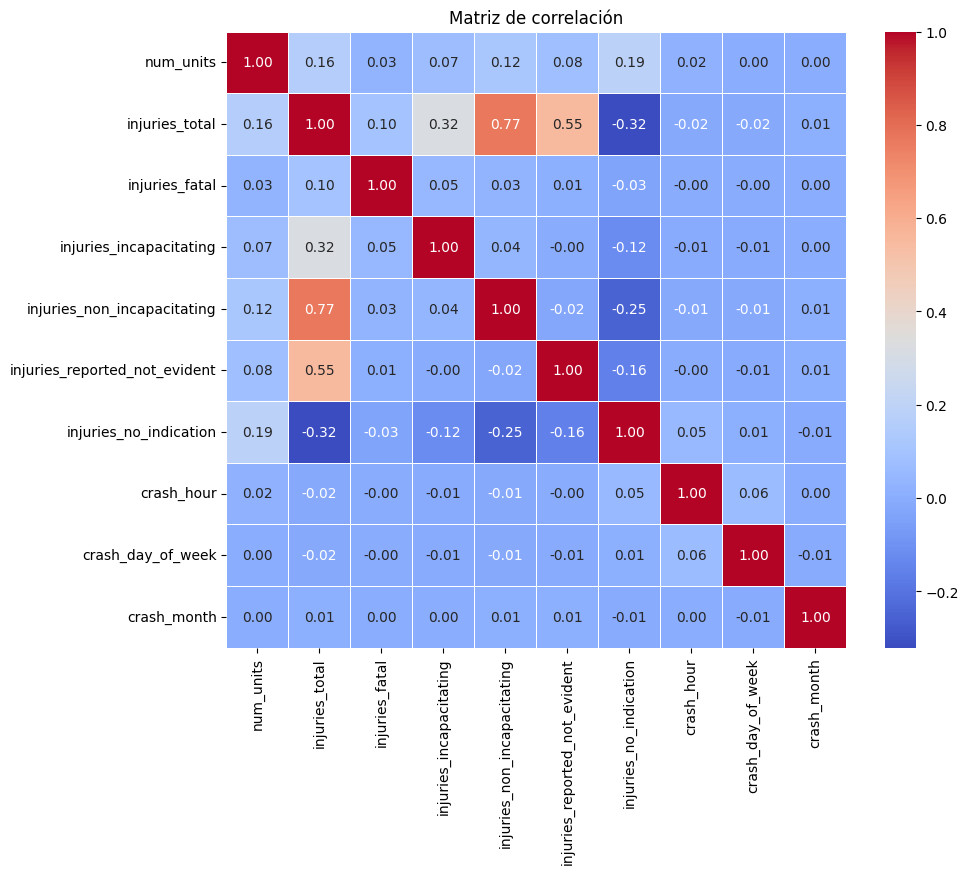

In [ ]:

numeric_columns = df.select_dtypes(include=['number']).columns

corr_matrix = df[numeric_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

## Accident Distribution by Hour
Identify at what times of the day most accidents occur.
Possible relationship with peak hours.


Distribución de la hora del accidente:


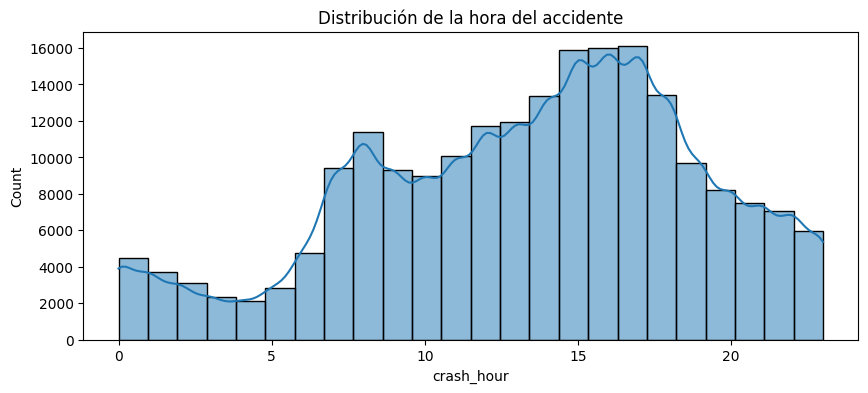

In [17]:
if 'crash_hour' in df.columns:
    print("\nDistribución de la hora del accidente:")
    plt.figure(figsize=(10, 4))
    sns.histplot(df['crash_hour'], bins=24, kde=True)
    plt.title('Distribución de la hora del accidente')
    plt.show()

## Histogram of Accidents by Month
Identify seasonal patterns in accidents.
Analyze whether there are months with more accidents and look for possible explanations.

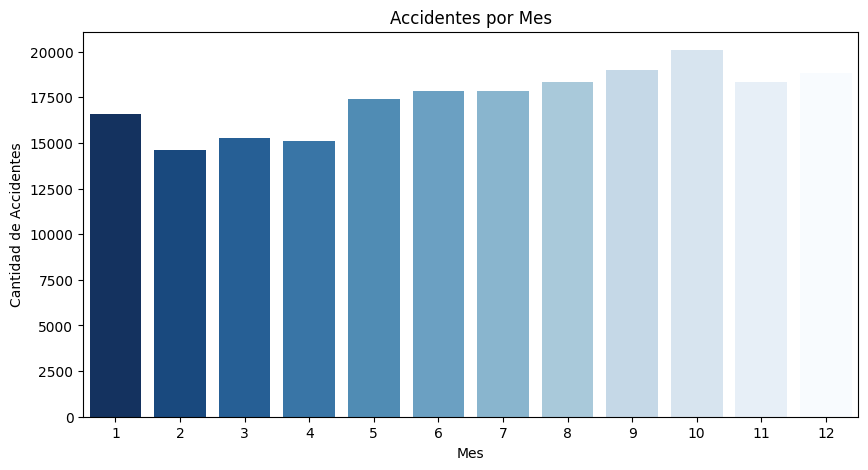

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="crash_month", data=df, hue="crash_month", palette="Blues_r", legend=False)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Accidentes por Mes")
plt.show()

## Weather Conditions Analysis in Accidents
Assess whether certain weather conditions increase the likelihood of accidents.
Identify whether bad weather has a significant impact on road safety.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23256\3220762609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")


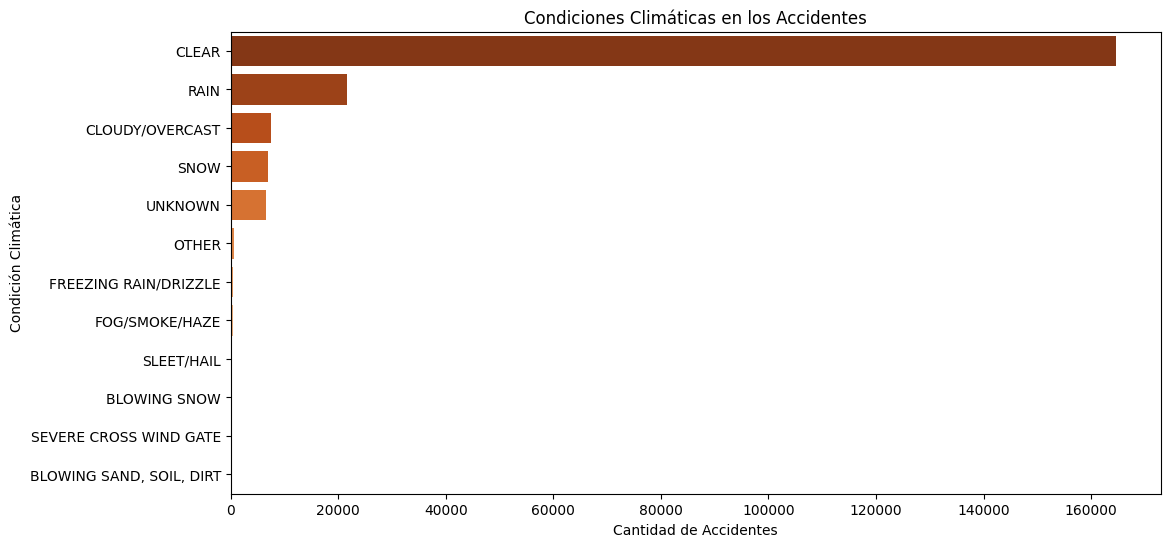

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="weather_condition", order=df['weather_condition'].value_counts().index, palette="Oranges_r")
plt.title("Condiciones Climáticas en los Accidentes")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Condición Climática")
plt.show()

## Relationship between Collision Type and Accident Severity
Analyze which types of collisions are most common.
Evaluate whether certain types of collisions lead to more serious accidents.

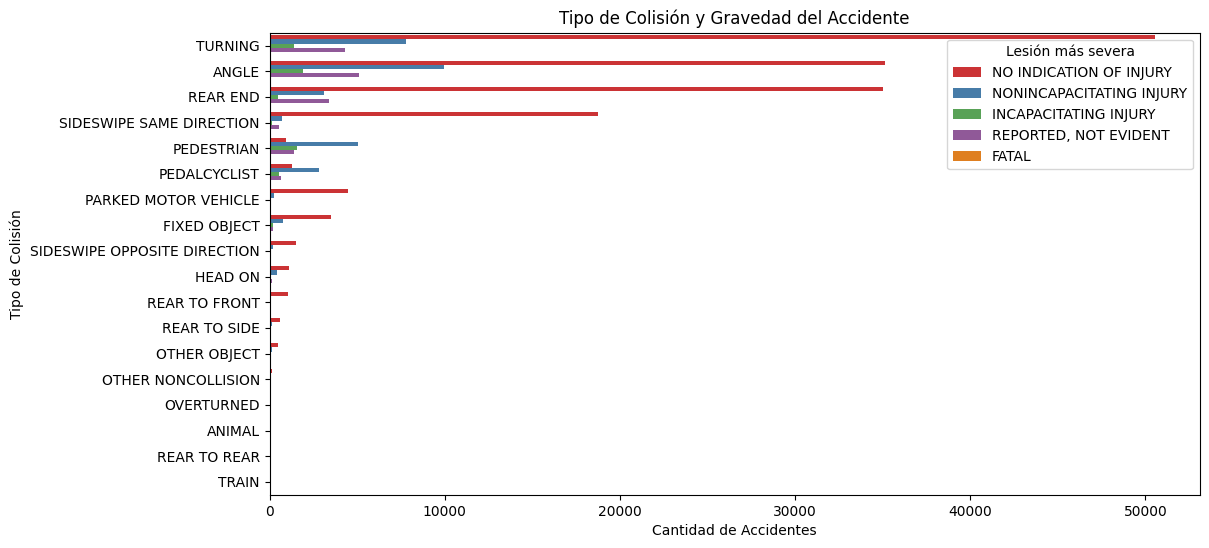

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="first_crash_type", hue="most_severe_injury", order=df['first_crash_type'].value_counts().index, palette="Set1")
plt.title("Tipo de Colisión y Gravedad del Accidente")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.legend(title="Lesión más severa")
plt.show()

## Filter Accidents with More than 10 Injuries
Identify which types of collisions result in accidents with many injuries.
Analyze whether certain crashes have a higher probability of causing serious harm.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23256\2888165827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collision_counts.values, y=collision_counts.index, palette="Reds_r")


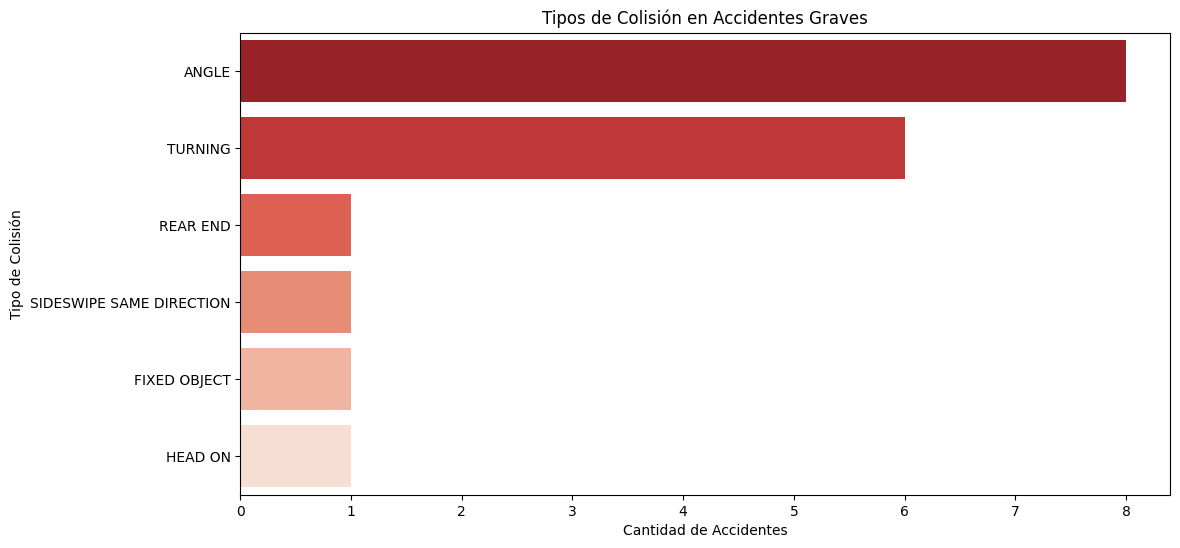

In [ ]:
high_injury_accidents = df[df["injuries_total"] > 10]


collision_counts = high_injury_accidents["first_crash_type"].value_counts()


plt.figure(figsize=(12, 6))
sns.barplot(x=collision_counts.values, y=collision_counts.index, palette="Reds_r")
plt.title("Tipos de Colisión en Accidentes Graves")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Tipo de Colisión")
plt.show()



## Analysis of the Relationship between Categorical and Numerical Variables
To evaluate whether certain weather conditions increase the number of injuries in accidents.
To detect possible patterns in the severity of accidents according to the weather.


Relación entre 'weather_condition' y 'injuries_total':


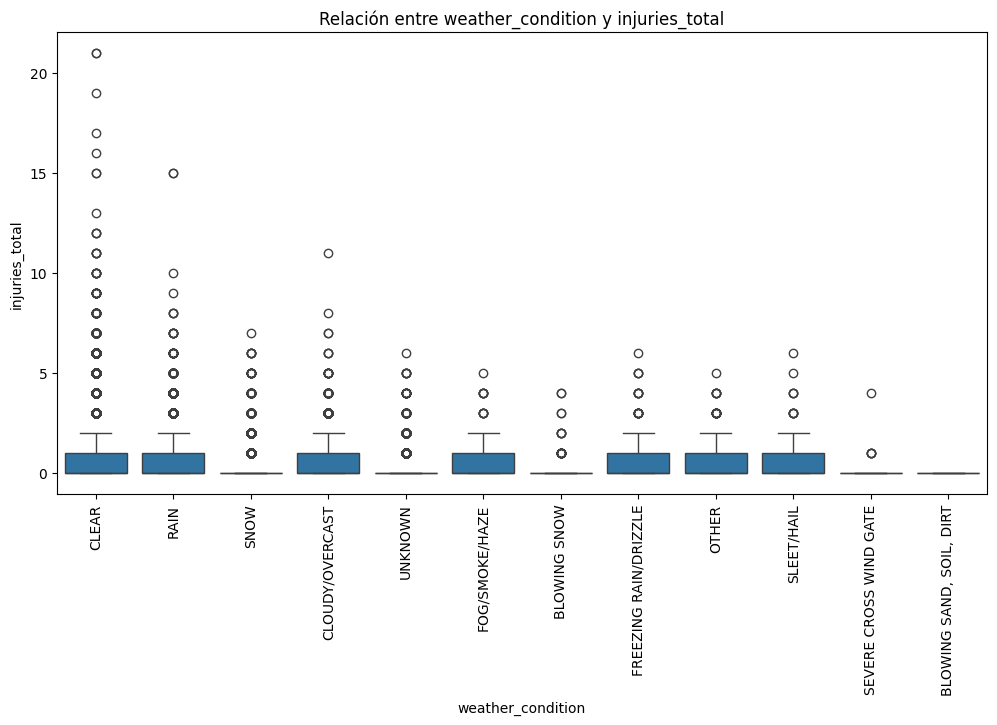

In [ ]:

if 'weather_condition' in df.columns and 'injuries_total' in df.columns:
    print("\nRelación entre 'weather_condition' y 'injuries_total':")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_total')
    plt.xticks(rotation=90)
    plt.title('Relación entre weather_condition y injuries_total')
    plt.show()

# conclution 

This exploratory analysis provides a comprehensive view of traffic accidents, allowing patterns related to weather conditions, accident severity, and collision types to be detected. The results indicate that adverse weather conditions, such as rain and snow, are associated with a higher number of injuries, highlighting the impact of environmental factors on road safety. Additionally, certain collision types, such as frontal and multi-vehicle crashes, tend to result in more severe injuries.

With this information, road safety strategies can be optimized by implementing preventive measures, such as improving infrastructure, enhancing public awareness campaigns, and adjusting traffic regulations based on weather conditions. Furthermore, identifying high-risk periods and locations can help authorities allocate resources more efficiently, ultimately reducing the number and severity of accidents.

